# uber Data Analysis

In [7]:
# Imports all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [8]:
files = os.listdir(r'E:\ML-Bootcamp-Practical\Data Analysis Projects\data\uber')

In [9]:
# import all the dataset and make a final data

data = pd.DataFrame()
for file in files:
    single_data = pd.read_csv('./data/uber/' + file, encoding='utf-8')
    data = pd.concat([single_data, data])

In [10]:
# data.to_csv('./data/uber/merged_data.csv', index=False, encoding='utf-8')

# Now We Start Data analysis
#### 1. Prepare out data

In [11]:
# import dataset

data = pd.read_csv('./data/uber/merged_data.csv')
data.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [12]:
# here all the infos of our datasets

# data.head(5)
# data.info()
# data.isnull().sum()
# data.describe()
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [13]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

In [14]:
data.dtypes
# data.head()

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [15]:
# data['WeekDay'] = data['Date/Time'].dt.day_name()
data['Day'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour
data['Minute'] = data['Date/Time'].dt.minute
data['Second'] = data['Date/Time'].dt.second

In [16]:
data.head()
# data['Month'] = data['Date/Time'].dt.month

,Date/Time,Lat,Lon,Base,Day,Hour,Minute,Second
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,3,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,6,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,11,0


### Analysis
1. Analysis of journey by Week-days
2. Analysis of journey by hour

In [17]:
data.columns
'''
    Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Days', 'Day', 'Hour', 'Minute',
        'Second', 'Month'],
        dtype='object')
'''

data['Days'].value_counts().index

KeyError: 'Days'

In [63]:
fig = px.bar(
    x=data['Days'].value_counts().index,
    y=data['Days'].value_counts(),
    height=700
)
fig.show()

# data['Days'].value_counts().index

In [ ]:
# journey by hour
data['Hour'].unique()
fig = px.bar(
    x=data['Hour'].value_counts().index,
    y=data['Hour'].value_counts(),
    color=data['Hour'].value_counts().index
)
fig.show()

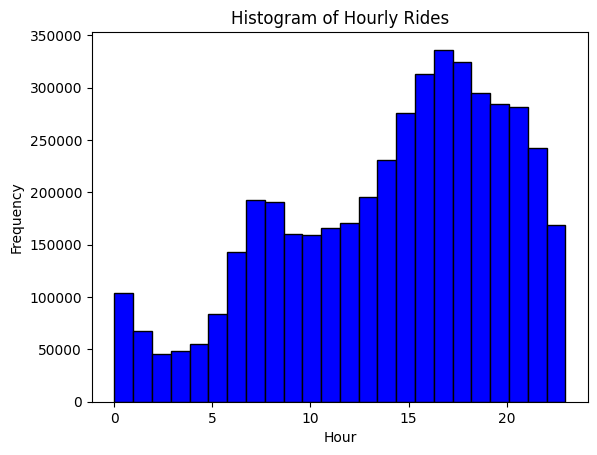

In [78]:
# Plotting a histogram for the 'Hour' column
plt.hist(data['Hour'], bins=24, color='blue', edgecolor='black')
plt.title('Histogram of Hourly Rides')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

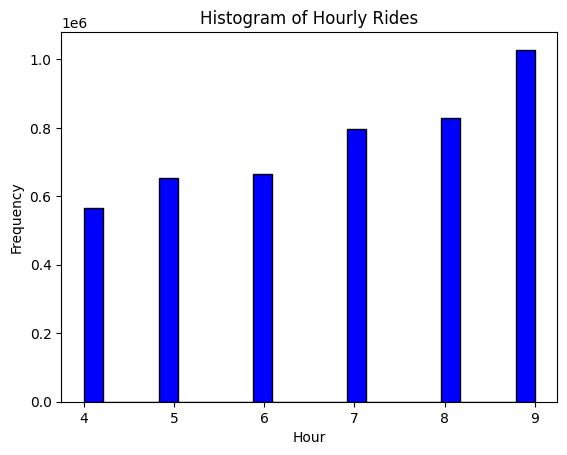

In [79]:
# Plotting a histogram for the 'Month' column
plt.hist(data['Month'], bins=24, color='blue', edgecolor='black')
plt.title('Histogram of Hourly Rides')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

### Analysis month rides
1. Analysis of which month has max rides
2. Analysis of journey of each day

In [ ]:
# every month number of time to ride
data.groupby('Month')['Hour'].count()

Month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: Hour, dtype: int64

In [82]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [88]:
trace1 = go.Bar(
    x = data.groupby('Month')['Hour'].count().index,
    y = data.groupby('Month')['Hour'].count(),
    name= "Priority",
)

In [ ]:
iplot([trace1])

Text(0.5, 1.0, 'Journey by date in in months')

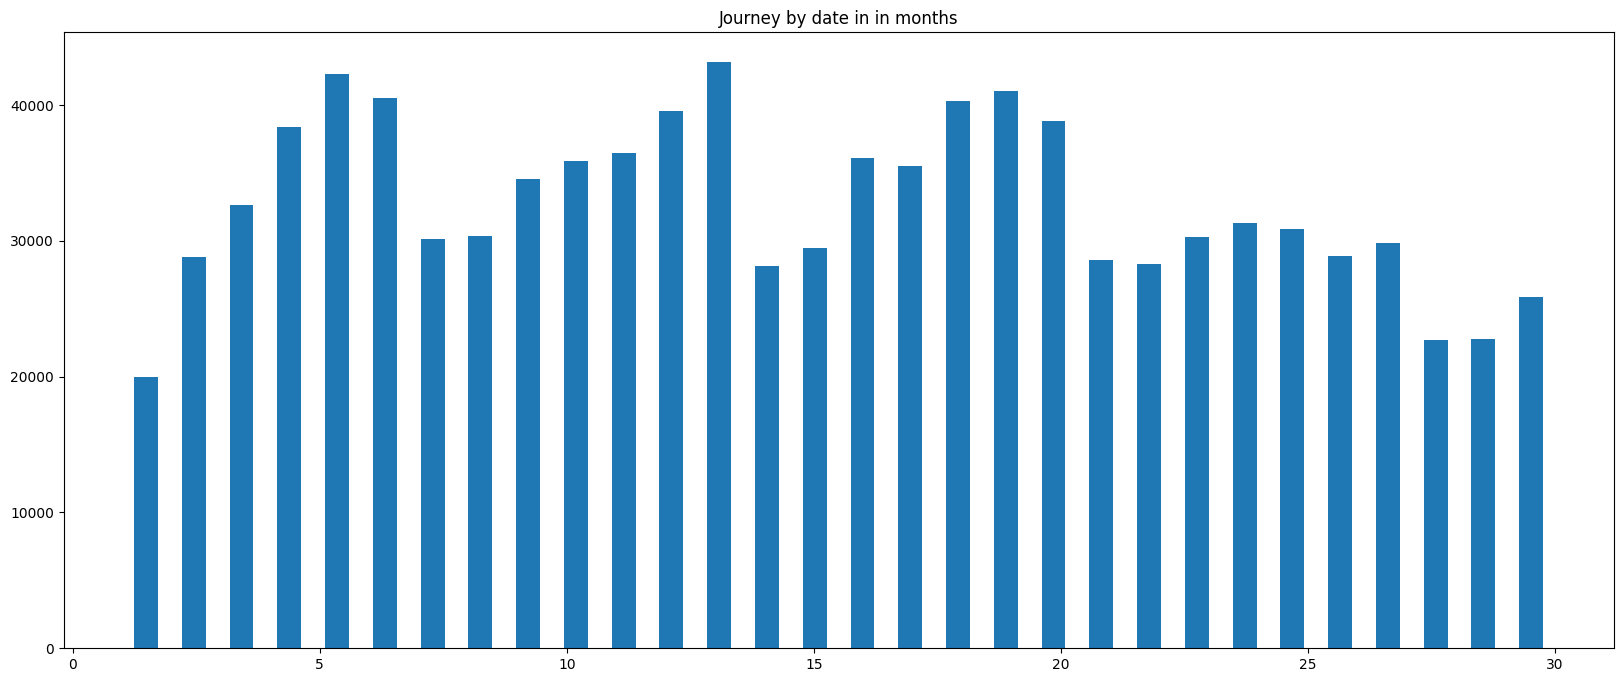

In [19]:
# sns.distplot(data['Day'])
plt.figure(figsize=(20, 8))
plt.hist(data['Day'], bins=30, rwidth=0.5)
plt.title('Journey by date in in months')